## Codes by Humphrey

In [65]:
library(foreign) ; library(tsModel) ; library(lmtest) ; library(Epi)
library(splines) ; library(grid); library(vcd)
library (dplyr) ; library (xtable)
library(sandwich) ; library(lmtest)
install.packages("foreign")
install.packages("Synth")
install.packages("dplyr")
install.packages("gridExtra")
install.packages("tidyverse") 
install.packages("lubridate")
install.packages("tree")
install.packages("Matching")
install.packages("boot")
install.packages("randomForest")
install.packages("arm")
install.packages("ggplot2")
install.packages("cobalt")
library(cobalt)
library(sm)
library(tidyverse) # for data manipulation and visualization
library(lubridate)
library(tree)
library(Matching)
library(boot)
library(randomForest)
library(arm)
library(ggplot2)
library(cobalt)
library(foreign) 
library(splines)
library(grid)
library (dplyr)
library (xtable)
library(lmtest)
library(Synth)
library(gridextra)


alldata<- read.csv("C:\\Users\\jacob\\Downloads\\Personal\\2001_Table1ALL.csv")
alldata$Rate <- alldata$Deaths/alldata$StdPop

ERROR: Error in library(foreign): there is no package called 'foreign'


In [8]:
alldata <- read.csv("C:\\Users\\jacob\\Downloads\\Personal\\2001_Table1ALL.csv")
replicationdata <- read.csv("C:\\Users\\jacob\\Downloads\\Personal\\Table 2 Replication Data.csv")
extensiondata <- read.csv("C:\\Users\\jacob\\Downloads\\Personal\\Table 2 Extension Data.csv")
homicide<- read.csv("https://raw.githubusercontent.com/thetruejacob/Final-Project/master/data/homicide_suicide%20(outcome)/cdc_homicide_all.csv")
firearms <- read.csv("https://raw.githubusercontent.com/thetruejacob/Final-Project/master/data/matching-data.csv")
#which(is.na(alldata)) # The which() function returns the positions with missing values in your vector
#which(is.na(replicationdata)) # The which() function returns the positions with missing values in your vector
#which(is.na(extensiondata)) # The which() function returns the positions with missing values in your vector
alldata1 <- na.omit(alldata)
replicationdata1 <- na.omit(replicationdata)
extensiondata1 <- na.omit(extensiondata)
head(alldata1)
head(replicationdata1)
head(extensiondata1)
tail(replicationdata1)
tail(extensiondata1)

MonYear,Year,MonthNo,Deaths,Treatment,Effective,Pop,StdPop,Time,Trend,OrigData,Cause,Data.Table,Characteristic
"Jan., 1999",1999,1,49,1,0,15759421,157.5942,1,0,1,Combo,Table1,All
"Feb., 1999",1999,2,41,1,0,15759421,157.5942,2,0,1,Combo,Table1,All
"Mar., 1999",1999,3,50,1,0,15759421,157.5942,3,0,1,Combo,Table1,All
"Apr., 1999",1999,4,42,1,0,15759421,157.5942,4,0,1,Combo,Table1,All
"May, 1999",1999,5,46,1,0,15759421,157.5942,5,0,1,Combo,Table1,All
"Jun., 1999",1999,6,49,1,0,15759421,157.5942,6,0,1,Combo,Table1,All


State,MonYear,Year,MonthNo,Characteristic,Deaths,Cause,Treatment,Population
FL,"Jan., 1999",1999,1,20-34,24,Firearm Homicide,1,2958306
FL,"Feb., 1999",1999,2,20-34,20,Firearm Homicide,1,2958306
FL,"Mar., 1999",1999,3,20-34,24,Firearm Homicide,1,2958306
FL,"Apr., 1999",1999,4,20-34,23,Firearm Homicide,1,2958306
FL,"May, 1999",1999,5,20-34,24,Firearm Homicide,1,2958306
FL,"Jun., 1999",1999,6,20-34,28,Firearm Homicide,1,2958306


State,MonYear,Year,MonthNo,Characteristic,Deaths,Cause,Treatment,Population
FL,"Jan., 1999",1999,1,35 and over,15,All Firearm,1,8867116
FL,"Feb., 1999",1999,2,35 and over,15,All Firearm,1,8867116
FL,"Mar., 1999",1999,3,35 and over,20,All Firearm,1,8867116
FL,"Apr., 1999",1999,4,35 and over,13,All Firearm,1,8867116
FL,"May, 1999",1999,5,35 and over,17,All Firearm,1,8867116
FL,"Jun., 1999",1999,6,35 and over,11,All Firearm,1,8867116


,State,MonYear,Year,MonthNo,Characteristic,Deaths,Cause,Treatment,Population
8851,FL,"Jul., 2016",2016,7,Hispanic Any Race,14,All Firearm,1,5126975
8852,FL,"Aug., 2016",2016,8,Hispanic Any Race,12,All Firearm,1,5126975
8853,FL,"Sep., 2016",2016,9,Hispanic Any Race,11,All Firearm,1,5126975
8854,FL,"Oct., 2016",2016,10,Hispanic Any Race,15,All Firearm,1,5126975
8855,FL,"Nov., 2016",2016,11,Hispanic Any Race,13,All Firearm,1,5126975
8856,FL,"Dec., 2016",2016,12,Hispanic Any Race,15,All Firearm,1,5126975


,State,MonYear,Year,MonthNo,Characteristic,Deaths,Cause,Treatment,Population
9067,FL,"Jul., 2016",2016,7,White,270,Suicide,1,15996473
9068,FL,"Aug., 2016",2016,8,White,254,Suicide,1,15996473
9069,FL,"Sep., 2016",2016,9,White,245,Suicide,1,15996473
9070,FL,"Oct., 2016",2016,10,White,247,Suicide,1,15996473
9071,FL,"Nov., 2016",2016,11,White,250,Suicide,1,15996473
9072,FL,"Dec., 2016",2016,12,White,229,Suicide,1,15996473


In [9]:
### HOMICIDES ###

# Subset Data
allhom <-subset(alldata, Cause=="AllHomicide")
FloridaHomOrig <- subset(allhom, Treatment ==1 & OrigData ==1)
ControlHomOrig <- subset(allhom, Treatment ==0 & OrigData ==1)

# Mean Monthly Counts - Original
mean(FloridaHomOrig$Deaths[FloridaHomOrig$Effective==0]) ##Florida before
mean(FloridaHomOrig$Deaths[FloridaHomOrig$Effective==1]) ##Florida after
mean(ControlHomOrig$Deaths[ControlHomOrig$Effective==0]) ##Control States before
mean(ControlHomOrig$Deaths[ControlHomOrig$Effective==1]) ##Control States after

# Mean Rate Counts 
mean(FloridaHomOrig$Rate[FloridaHomOrig$Effective==0]) #Florida Before
mean(FloridaHomOrig$Rate[FloridaHomOrig$Effective==1]) #Florida After
mean(ControlHomOrig$Rate[ControlHomOrig$Effective==0]) ##Control States before
mean(ControlHomOrig$Rate[ControlHomOrig$Effective==1]) ##Control States after

[1] 81.92593

[1] 99.22523

[1] 189.4125

[1] 182.7387

Warning message in mean.default(FloridaHomOrig$Rate[FloridaHomOrig$Effective == :
"argument is not numeric or logical: returning NA"

[1] NA

Warning message in mean.default(FloridaHomOrig$Rate[FloridaHomOrig$Effective == :
"argument is not numeric or logical: returning NA"

[1] NA

Warning message in mean.default(ControlHomOrig$Rate[ControlHomOrig$Effective == :
"argument is not numeric or logical: returning NA"

[1] NA

Warning message in mean.default(ControlHomOrig$Rate[ControlHomOrig$Effective == :
"argument is not numeric or logical: returning NA"

[1] NA

In [10]:

# Subset Data
firehom <- subset(alldata, Cause=="FirearmHomicide")
FFireHomOrig <- subset(firehom, Treatment ==1 & OrigData ==1)
CSFireHomOrig <- subset(firehom, Treatment ==0 & OrigData ==1)

# Mean Monthly Counts
mean(FFireHomOrig$Deaths[FFireHomOrig$Effective==0]) ##Florida before
mean(FFireHomOrig$Deaths[FFireHomOrig$Effective==1]) ##Florida after
mean(CSFireHomOrig$Deaths[CSFireHomOrig$Effective==0]) ##Control States before
mean(CSFireHomOrig$Deaths[CSFireHomOrig$Effective==1]) ##Control States after

# Mean Rate Counts
mean(FFireHomOrig$Rate[FFireHomOrig$Effective==0]) #Florida Before
mean(FFireHomOrig$Rate[FFireHomOrig$Effective==1]) # Florida After
mean(CSFireHomOrig$Rate[CSFireHomOrig$Effective==0]) ##Control States before
mean(CSFireHomOrig$Rate[CSFireHomOrig$Effective==1]) ##Control States after

[1] 49.06173

[1] 69.2973

[1] 116.3333

[1] 119.1351

Warning message in mean.default(FFireHomOrig$Rate[FFireHomOrig$Effective == 0]):
"argument is not numeric or logical: returning NA"

[1] NA

Warning message in mean.default(FFireHomOrig$Rate[FFireHomOrig$Effective == 1]):
"argument is not numeric or logical: returning NA"

[1] NA

Warning message in mean.default(CSFireHomOrig$Rate[CSFireHomOrig$Effective == 0]):
"argument is not numeric or logical: returning NA"

[1] NA

Warning message in mean.default(CSFireHomOrig$Rate[CSFireHomOrig$Effective == 1]):
"argument is not numeric or logical: returning NA"

[1] NA

In [11]:

### SUICIDES ###

# Subset Data
allsuicides <- subset(alldata, Cause=="Suicide")
Florida.SuiOrig <- subset(allsuicides, Treatment ==1 & OrigData ==1)
CS.SuiOrig <- subset(allsuicides, Treatment ==0 & OrigData ==1)

# Mean Monthly Counts - All Suicide
mean(Florida.SuiOrig$Deaths[Florida.SuiOrig$Effective==0]) ##Florida before
mean(Florida.SuiOrig$Deaths[Florida.SuiOrig$Effective==1]) ##Florida after
mean(CS.SuiOrig$Deaths[CS.SuiOrig$Effective==0]) ##Control States before
mean(CS.SuiOrig$Deaths[CS.SuiOrig$Effective==1]) ##Control States after

# Mean Rate Counts - All Suicide
mean(Florida.SuiOrig$Rate[Florida.SuiOrig$Effective==0]) #Florida Before
mean(Florida.SuiOrig$Rate[Florida.SuiOrig$Effective==1]) # Florida After
mean(CS.SuiOrig$Rate[CS.SuiOrig$Effective==0]) ##Control States before
mean(CS.SuiOrig$Rate[CS.SuiOrig$Effective==1]) ##Control States after

[1] 188.2593

[1] 232.5225

[1] 314.1852

[1] 382.2072

Warning message in mean.default(Florida.SuiOrig$Rate[Florida.SuiOrig$Effective == :
"argument is not numeric or logical: returning NA"

[1] NA

Warning message in mean.default(Florida.SuiOrig$Rate[Florida.SuiOrig$Effective == :
"argument is not numeric or logical: returning NA"

[1] NA

Warning message in mean.default(CS.SuiOrig$Rate[CS.SuiOrig$Effective == 0]):
"argument is not numeric or logical: returning NA"

[1] NA

Warning message in mean.default(CS.SuiOrig$Rate[CS.SuiOrig$Effective == 1]):
"argument is not numeric or logical: returning NA"

[1] NA

In [12]:

# Subset Data
FASuic <- subset(alldata, Cause=="FirearmSuicide")
FFASuicOrig <- subset(FASuic, Treatment ==1 & OrigData ==1)
CSFASuicOrig <- subset(FASuic, Treatment ==0 & OrigData ==1)

# Mean Monthly Counts - Firearm Suicide
mean(FFASuicOrig$Deaths[FFASuicOrig$Effective==0]) ##Florida before
mean(FFASuicOrig$Deaths[FFASuicOrig$Effective==1]) ##Florida after
mean(CSFASuicOrig$Deaths[CSFASuicOrig$Effective==0]) ##Control States before
mean(CSFASuicOrig$Deaths[CSFASuicOrig$Effective==1]) ##Control States after

# Mean Rate Counts - Firearm Suicide
mean(FFASuicOrig$Rate[FFASuicOrig$Effective==0]) #Florida Before
mean(FFASuicOrig$Rate[FFASuicOrig$Effective==1]) # Florida After
mean(CSFASuicOrig$Rate[CSFASuicOrig$Effective==0]) ##Control States before
mean(CSFASuicOrig$Rate[CSFASuicOrig$Effective==1]) ##Control States after

[1] 99.32099

[1] 119.4505

[1] 129.3086

[1] 143.1892

Warning message in mean.default(FFASuicOrig$Rate[FFASuicOrig$Effective == 0]):
"argument is not numeric or logical: returning NA"

[1] NA

Warning message in mean.default(FFASuicOrig$Rate[FFASuicOrig$Effective == 1]):
"argument is not numeric or logical: returning NA"

[1] NA

Warning message in mean.default(CSFASuicOrig$Rate[CSFASuicOrig$Effective == 0]):
"argument is not numeric or logical: returning NA"

[1] NA

Warning message in mean.default(CSFASuicOrig$Rate[CSFASuicOrig$Effective == 1]):
"argument is not numeric or logical: returning NA"

[1] NA

In [13]:
# Homicide
BGtesthomF<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                 family=quasipoisson, FloridaHomOrig) 
bgtest(BGtesthomF)
bgtest(BGtesthomF, order=12)
##Result - Florida no
BGtesthomCS<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                  family=quasipoisson, ControlHomOrig) 
bgtest(BGtesthomCS)
bgtest(BGtesthomCS, order=12)
##Result - CS yes

# Homicide by Firearm
BGtestfirehomF<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                     family=quasipoisson, FFireHomOrig) 
bgtest(BGtestfirehomF)
BGtestfirehomCS<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                      family=quasipoisson, CSFireHomOrig) 
bgtest(BGtestfirehomCS)
##Result - CS and florida yes


# Suicide
BGtestsuicideF<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                     family=quasipoisson, Florida.SuiOrig) 
bgtest(BGtestsuicideF)
bgtest(BGtestsuicideF, order=12)
BGtestsuicideCS<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                      family=quasipoisson, CS.SuiOrig) 
bgtest(BGtestsuicideCS)
bgtest(BGtestsuicideCS, order=12)
##Result - CS and florida yes


## Suicide by Firearm
# Test for autocorrelation for Firearm Suicide
BGtestFsuicideF<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time, 
                      family=quasipoisson, FFASuicOrig) 
bgtest(BGtestFsuicideF, order=12)

BGtestFsuicideCS<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                       family=quasipoisson, CSFASuicOrig) 
bgtest(BGtestFsuicideCS, order=12)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtesthomF
LM test = 0.18525, df = 1, p-value = 0.6669



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtesthomF
LM test = 14.254, df = 12, p-value = 0.2848



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtesthomCS
LM test = 11.88, df = 1, p-value = 0.0005674



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtesthomCS
LM test = 35.725, df = 12, p-value = 0.0003586



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtestfirehomF
LM test = 4.0692, df = 1, p-value = 0.04367



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtestfirehomCS
LM test = 9.0503, df = 1, p-value = 0.002627



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtestsuicideF
LM test = 1.9761, df = 1, p-value = 0.1598



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtestsuicideF
LM test = 26.394, df = 12, p-value = 0.009436



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtestsuicideCS
LM test = 4.7704, df = 1, p-value = 0.02895



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtestsuicideCS
LM test = 44.426, df = 12, p-value = 1.292e-05



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtestFsuicideF
LM test = 20.567, df = 12, p-value = 0.05709



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtestFsuicideCS
LM test = 24.525, df = 12, p-value = 0.01724


In [21]:
library(sandwich)
Rep.Florida.Homicide <- rep(NA)
for (dataset in c("FloridaHomOrig")){
  if (dataset == "FloridaHomOrig"){
    temp.data <- FloridaHomOrig
  }
  Test<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
             family=quasipoisson, temp.data) 
  
  stepchangeestimate <- exp(ci.lin(Test, subset="Effective")[,"Estimate"])
  stepchangebottomCI <- exp(ci.lin(Test, subset="Effective")[,"2.5%"])
  stepchangetopCI <- exp(ci.lin(Test, subset="Effective")[,"97.5%"])
  stepchangep <- summary(Test)$coefficients["Effective",4]
  Step.Changeall <- rbind(stepchangebottomCI, stepchangeestimate, stepchangetopCI, stepchangep)
  trendestimate <- exp(ci.lin(Test, subset="Time")[,"Estimate"])
  trendbottomCI <- exp(ci.lin(Test, subset="Time")[,"2.5%"])
  trendtopCI <- exp(ci.lin(Test, subset="Time")[,"97.5%"])
  trendpval <- summary(Test)$coefficients["Time",4]
  trendall <- rbind(trendbottomCI, trendestimate, trendtopCI, trendpval)
  dta <- data.frame(Step.Changeall, trendall, type = dataset)
  Rep.Florida.Homicide <- cbind(Rep.Florida.Homicide, dta)
  rownames(Rep.Florida.Homicide) = c("Bottom CI","Estimate", "Top CI", "P Value")
}
Rep.Florida.Homicide
Rep.Florida.Homicide

## FOR LOOP FOR EVERYTHING WITH ROBUST SE
Table1ModelsRSE <- NA
for (dataset in c("ControlHomOrig", "FFireHomOrig","CSFireHomOrig","Florida.SuiOrig","CS.SuiOrig","FFASuicOrig","CSFASuicOrig")){
  if (dataset == "ControlHomOrig"){
    temp.data <- ControlHomOrig
  }
  else if (dataset == "FFireHomOrig"){
    temp.data <- FFireHomOrig
  }
  else if (dataset == "CSFireHomOrig"){
    temp.data <- CSFireHomOrig
  }
  else if (dataset == "Florida.SuiOrig"){
    temp.data <- Florida.SuiOrig
  }
  else if (dataset == "CS.SuiOrig"){
    temp.data <- CS.SuiOrig
  }
  else if (dataset == "FFASuicOrig"){
    temp.data <- FFASuicOrig
  } 
  else if (dataset == "CSFASuicOrig"){
    temp.data <- CSFASuicOrig
  } 
 Harmonicmodel<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                      family=quasipoisson, temp.data) 
  coef <- coef(Harmonicmodel)["Effective"]
  se <- sqrt(vcovHAC(Harmonicmodel)["Effective","Effective"])
  Step.Change <-c(ll=exp(coef-qnorm(0.975)*se),RR=exp(coef), ul=exp(coef+qnorm(0.975)*se),
                  summary(Harmonicmodel)$coefficients["Effective",4] )
  trendestimate <- exp(ci.lin(Harmonicmodel, subset="Time")[,"Estimate"])
  trendpval <- summary(Harmonicmodel)$coefficients["Time",4]
  trendbottomCI <- exp(ci.lin(Harmonicmodel, subset="Time")[,"2.5%"])
  trendtopCI <- exp(ci.lin(Harmonicmodel, subset="Time")[,"97.5%"])
  trendall <- rbind(trendbottomCI, trendestimate, trendtopCI, trendpval)
  dta3 <- data.frame(Step.Change, trendall, type = dataset)
  Table1ModelsRSE <- cbind(Table1ModelsRSE, dta3)
  rownames(Table1ModelsRSE) = c("Bottom CI","Step Change", "Top CI", "P Value")
}
Table1ModelsRSE

Warning message:
"package 'sandwich' was built under R version 3.6.3"

,Rep.Florida.Homicide,Step.Changeall,trendall,type
Bottom CI,NA,1.163083e+00,9.978146e-01,FloridaHomOrig
Estimate,NA,1.243856e+00,9.984096e-01,FloridaHomOrig
Top CI,NA,1.330237e+00,9.990051e-01,FloridaHomOrig
P Value,NA,1.457995e-09,4.504536e-07,FloridaHomOrig


,Rep.Florida.Homicide,Step.Changeall,trendall,type
Bottom CI,NA,1.163083e+00,9.978146e-01,FloridaHomOrig
Estimate,NA,1.243856e+00,9.984096e-01,FloridaHomOrig
Top CI,NA,1.330237e+00,9.990051e-01,FloridaHomOrig
P Value,NA,1.457995e-09,4.504536e-07,FloridaHomOrig


,Table1ModelsRSE,Step.Change,trendall,type,Step.Change.1,trendall.1,type.1,Step.Change.2,trendall.2,type.2,...,type,Step.Change,trendall,type.1,Step.Change.1,trendall.1,type.2,Step.Change.2,trendall.2,type.3
Bottom CI,NA,0.98577381,9.981960e-01,ControlHomOrig,1.205481e+00,0.9986225,FFireHomOrig,0.98655403,0.99851672,CSFireHomOrig,...,Florida.SuiOrig,0.9571879,1.001415e+00,CS.SuiOrig,0.9100831,1.000233280,FFASuicOrig,0.90096983,1.000750e+00,CSFASuicOrig
Step Change,NA,1.05708948,9.986992e-01,ControlHomOrig,1.315861e+00,0.9994129,FFireHomOrig,1.07627849,0.99914213,CSFireHomOrig,...,Florida.SuiOrig,0.9959616,1.001777e+00,CS.SuiOrig,0.9815614,1.000822887,FFASuicOrig,0.95544824,1.001227e+00,CSFASuicOrig
Top CI,NA,1.13356448,9.992026e-01,ControlHomOrig,1.436348e+00,1.0002038,FFireHomOrig,1.17416316,0.99976793,CSFireHomOrig,...,Florida.SuiOrig,1.0363060,1.002139e+00,CS.SuiOrig,1.0586536,1.001412841,FFASuicOrig,1.01322078,1.001704e+00,CSFASuicOrig
P Value,NA,0.05355714,9.987271e-07,ControlHomOrig,1.244803e-08,0.1473518,FFireHomOrig,0.04154977,0.00787837,CSFireHomOrig,...,Florida.SuiOrig,0.8474703,4.583058e-18,CS.SuiOrig,0.5862008,0.006829904,FFASuicOrig,0.09987135,1.096047e-06,CSFASuicOrig


In [22]:

#########################
##  INTERACTION MODELS ##
#########################

## Homicide
HomInteractOrig <- glm(Deaths ~ offset(log(StdPop)) + Effective*Treatment + Time*Treatment
                       + harmonic(MonthNo,2,12),family=quasipoisson, allhom, subset = OrigData ==1)
ci.lin(HomInteractOrig,subset="Effective:Treatment")

## All Suicides
SuicideInteract <- glm(Deaths ~ offset(log(StdPop)) + Effective*Treatment + Time*Treatment
                       + harmonic(MonthNo,2,12),family=quasipoisson, allsuicides, subset = OrigData ==1)
ci.lin(SuicideInteract,subset="Effective:Treatment")

## Firearm Homicide
FireHomInteract <- glm(Deaths ~ offset(log(StdPop)) + Effective*Treatment + Time*Treatment
                       + harmonic(MonthNo,2,12),family=quasipoisson, firehom, subset = OrigData ==1)
ci.lin(FireHomInteract,subset="Effective:Treatment")

## Firearm Suicides
FirearmSuicideInteract <- glm(Deaths ~ offset(log(StdPop)) + Effective*Treatment + Time*Treatment
                              + harmonic(MonthNo,2,12),family=quasipoisson, FASuic, subset = OrigData ==1)
ci.lin(FirearmSuicideInteract,subset="Effective:Treatment")

,Estimate,StdErr,z,P,2.5%,97.5%
Effective:Treatment,0.1704733,0.04621531,3.688675,0.0002254251,0.07989291,0.2610536


,Estimate,StdErr,z,P,2.5%,97.5%
Effective:Treatment,-0.001351945,0.03410075,-0.03964563,0.9683757,-0.06818818,0.06548429


,Estimate,StdErr,z,P,2.5%,97.5%
Effective:Treatment,0.2113513,0.05934362,3.561484,0.0003687652,0.09503998,0.3276627


,Estimate,StdErr,z,P,2.5%,97.5%
Effective:Treatment,0.02678262,0.0434747,0.6160508,0.537861,-0.05842622,0.1119915


In [27]:
head(repfirehom)

,MonYear,Year,MonthNo,Deaths,Treatment,Effective,Pop,StdPop,Time,Trend,OrigData,Cause,Data.Table,Characteristic,Level,TXtime,TXlevel,TXtrend
865,"Jan., 1999",1999,1,46,1,0,15759421,157.5942,1,0,1,FirearmHomicide,Table1,All,0,1,0,0
866,"Feb., 1999",1999,2,39,1,0,15759421,157.5942,2,0,1,FirearmHomicide,Table1,All,0,2,0,0
867,"Mar., 1999",1999,3,48,1,0,15759421,157.5942,3,0,1,FirearmHomicide,Table1,All,0,3,0,0
868,"Apr., 1999",1999,4,38,1,0,15759421,157.5942,4,0,1,FirearmHomicide,Table1,All,0,4,0,0
869,"May, 1999",1999,5,45,1,0,15759421,157.5942,5,0,1,FirearmHomicide,Table1,All,0,5,0,0
870,"Jun., 1999",1999,6,47,1,0,15759421,157.5942,6,0,1,FirearmHomicide,Table1,All,0,6,0,0


In [30]:
################
##  Figure 1B ##
################

library(dplyr)
library(ggplot2)
library(tidyr)
repfirehom <- subset(alldata, Cause=="FirearmHomicide" & Year < 2015)

# Setup variables
repfirehom$Level <- c(rep(0,81),rep(1,111),rep(0,81),rep(1,111))
repfirehom$TXtime <- repfirehom$Treatment * repfirehom$Time
repfirehom$TXlevel <- repfirehom$Treatment * repfirehom$Level
repfirehom$TXtrend <- repfirehom$Treatment * repfirehom$Trend

# Models
repfirehom_crappy <- glm(Deaths ~ offset(log(StdPop)) + Time + Level + harmonic(MonthNo,2,12), 
                         family=quasipoisson, data=repfirehom)
repfirehom.mod <- with(repfirehom, Deaths/StdPop)
repfirehom.datanew <- data.frame(StdPop=mean(repfirehom$StdPop),
                                 Level=rep(c(0,1), c(819,1101)),
                                 Time = 1:1920/10,
                                 MonthNo = rep(1:120/10, 16))
repfirehom.pred1 <- predict(repfirehom_crappy,type="response",repfirehom.datanew)/mean(repfirehom$StdPop)
repfirehom.pred2 <- predict(repfirehom_crappy,type="response",transform(repfirehom.datanew,MonthNo=4.8))/mean(repfirehom$StdPop)

repfirehom_linear <- glm(Deaths ~ offset(log(StdPop)) + Time + Treatment + Level +  
                           TXtime + TXlevel, 
                         family=quasipoisson, data=repfirehom)
repfirehom_harmonic <- glm(Deaths ~ offset(log(StdPop)) + Time + Treatment + Level + 
                             TXtime + TXlevel + harmonic(MonthNo,2,12), 
                           family=quasipoisson, data=repfirehom)


In [39]:
################
##  Figure 1A ##
################

repallhom <- subset(alldata, Cause=="AllHomicide" & Year < 2015)

##Sept 2001 was removed from the analysis but is added back in to graph
allhomtop<-repallhom[1:224,]
allhomtbottom <- repallhom[225:383,]

##Spet 2001 was given the mean monthly count and rate in the before period 
Sept2001 <- cbind("Sept.,2001", 2001,9,189.4, 0,0,46161275, 461.6128,30,0,1,"AllHomicide","Table1","All",.41)
colnames(Sept2001)<- colnames(repallhom)
allhomtop <- rbind(allhomtop, Sept2001)
repallhom <- rbind(allhomtop,allhomtbottom)
repallhom <- transform(repallhom, StdPop = as.numeric(StdPop), Deaths = as.numeric(Deaths), Year = as.numeric(Year),
                       Treatment = as.numeric(Treatment), Pop = as.numeric(Pop), Time = as.numeric(Time), 
                       Trend = as.numeric(Trend), Rate = as.numeric(Rate), MonthNo = as.numeric(MonthNo))
# Setup variables
repallhom$Level <- c(rep(0,81),rep(1,111),rep(0,81),rep(1,111))
repallhom$Time <- c(rep(c(1:192), 2))
repallhom$Trend <- rep(c(rep(0,81), 1:111),2)
repallhom$TXtime <- repallhom$Treatment * repallhom$Time
repallhom$TXlevel <- repallhom$Treatment * repallhom$Level
repallhom$TXtrend <- repallhom$Treatment * repallhom$Trend
repallhom_crappy <- glm(Rate ~ offset(log(StdPop)) + Time + Level + harmonic(MonthNo,2,12), 
                        family=quasipoisson, data=repallhom)
repallhom.mod <- with(repallhom, Deaths/StdPop)
repallhom.datanew <- data.frame(StdPop=mean(repallhom$StdPop),
                                Level=rep(c(0,1), c(819,1101)),
                                Time = 1:1920/10,
                                MonthNo = rep(1:120/10, 16))

# Models
repallhom.pred1 <- predict(repallhom_crappy,type="response",repallhom.datanew)/mean(repallhom$StdPop)
repallhom.pred2 <- predict(repallhom_crappy,type="response",transform(repallhom,MonthNo=4.8))/mean(repallhom$StdPop)

repallhom_linear <- glm(Rate ~ offset(log(StdPop)) + Time + Treatment + Level +  
                          TXtime + TXlevel, 
                        family=quasipoisson, data=repallhom)
repallhom_harmonic <- glm(Rate ~ offset(log(StdPop)) + Time + Treatment + Level + 
                            TXtime + TXlevel + harmonic(MonthNo,2,12), 
                          family=quasipoisson, data=repallhom)
###Plot for replication all homicide 
plot(repfirehom$Time[1:192],repfirehom.mod[1:192],
     type="n",
     ylim=c(0,1),
     frame.plot=F,
     ylab="Deaths per 100,000",
     xlab="Year",
     xaxt="n",
     las=2)
axis(1,at=0:15*12+6,tick=T,labels=1999:2014) 
rect(81,0,192,1, col=grey(0.9),border=F)
points(repallhom$Time[1:192],repallhom.mod[1:192],
       col="darkorange2",
       pch=20)
points(repallhom$Time[193:384],repallhom.mod[193:384],
       col="dodgerblue4",
       pch=20)
lines(repallhom$Time[1:81], fitted(repallhom_linear)[1:81], col="darkorange",lty=5)
lines(repallhom$Time[1:81], fitted(repallhom_harmonic)[1:81], col="darkorange",lwd=2)
lines(repallhom$Time[82:192], fitted(repallhom_linear)[82:192], col="darkorange",lty=5)
lines(repallhom$Time[82:192], fitted(repallhom_harmonic)[82:192], col="darkorange",lwd=2)
lines(repallhom$Time[193:273], fitted(repallhom_linear)[193:273], col="dodgerblue4",lty=5)
lines(repallhom$Time[193:273], fitted(repallhom_harmonic)[193:273], col="dodgerblue4",lwd=2)
lines(repallhom$Time[274:384], fitted(repallhom_linear)[274:384], col="dodgerblue4",lty=5)
lines(repallhom$Time[274:384], fitted(repallhom_harmonic)[274:384], col="dodgerblue4",lwd=2)
legend(x=0, y=0.9, legend=c("Florida","Comparison States"), col=c("darkorange","dodgerblue4"),lwd = 2)
title(main="Replication: Homicide Rates \nFlorida and Comparison States 1999-2014")

ERROR: Error in dimnames(x) <- dn: length of 'dimnames' [2] not equal to array extent


In [40]:
repallhom

,MonYear,Year,MonthNo,Deaths,Treatment,Effective,Pop,StdPop,Time,Trend,OrigData,Cause,Data.Table,Characteristic
1297,"Jan., 1999",1999,1,75,1,0,15759421,157.5942,1,0,1,AllHomicide,Table1,All
1298,"Feb., 1999",1999,2,80,1,0,15759421,157.5942,2,0,1,AllHomicide,Table1,All
1299,"Mar., 1999",1999,3,84,1,0,15759421,157.5942,3,0,1,AllHomicide,Table1,All
1300,"Apr., 1999",1999,4,67,1,0,15759421,157.5942,4,0,1,AllHomicide,Table1,All
1301,"May, 1999",1999,5,84,1,0,15759421,157.5942,5,0,1,AllHomicide,Table1,All
1302,"Jun., 1999",1999,6,81,1,0,15759421,157.5942,6,0,1,AllHomicide,Table1,All
1303,"Jul., 1999",1999,7,95,1,0,15759421,157.5942,7,0,1,AllHomicide,Table1,All
1304,"Aug., 1999",1999,8,59,1,0,15759421,157.5942,8,0,1,AllHomicide,Table1,All
1305,"Sep., 1999",1999,9,78,1,0,15759421,157.5942,9,0,1,AllHomicide,Table1,All
1306,"Oct., 1999",1999,10,93,1,0,15759421,157.5942,10,0,1,AllHomicide,Table1,All


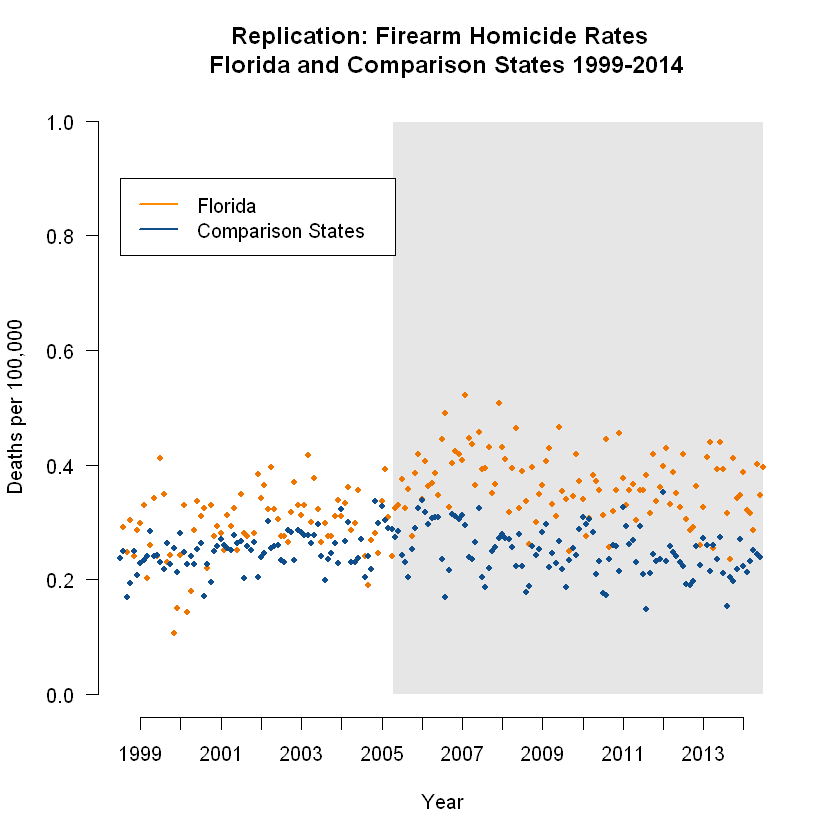

In [41]:
# Replication Plot for replication firearm homicide 
plot(repfirehom$Time[1:192],repfirehom.mod[1:192],
     type="n",
     ylim=c(0,1),
     frame.plot=F,
     ylab="Deaths per 100,000",
     xlab="Year",
     xaxt="n",
     las=2)
axis(1,at=0:15*12+6,tick=T,labels=1999:2014) 
rect(81,0,192,1, col=grey(0.9),border=F)
points(repfirehom$Time[1:192],repfirehom.mod[1:192],
       col="darkorange2",
       pch=20)
points(repfirehom$Time[193:384],repfirehom.mod[193:384],
       col="dodgerblue4",
       pch=20)
lines(repfirehom$Time[1:81], fitted(repfirehom_linear)[1:81], col="darkorange",lty=5)
lines(repfirehom$Time[1:81], fitted(repfirehom_harmonic)[1:81], col="darkorange",lwd=2)
lines(repfirehom$Time[82:192], fitted(repfirehom_linear)[82:192], col="darkorange",lty=5)
lines(repfirehom$Time[82:192], fitted(repfirehom_harmonic)[82:192], col="darkorange",lwd=2)
lines(repfirehom$Time[193:273], fitted(repfirehom_linear)[193:273], col="dodgerblue4",lty=5)
lines(repfirehom$Time[193:273], fitted(repfirehom_harmonic)[193:273], col="dodgerblue4",lwd=2)
lines(repfirehom$Time[274:384], fitted(repfirehom_linear)[274:384], col="dodgerblue4",lty=5)
lines(repfirehom$Time[274:384], fitted(repfirehom_harmonic)[274:384], col="dodgerblue4",lwd=2)
legend(x=0, y=0.9, legend=c("Florida","Comparison States"), col=c("darkorange","dodgerblue4"),lwd = 2)
title(main="Replication: Firearm Homicide Rates \n Florida and Comparison States 1999-2014")

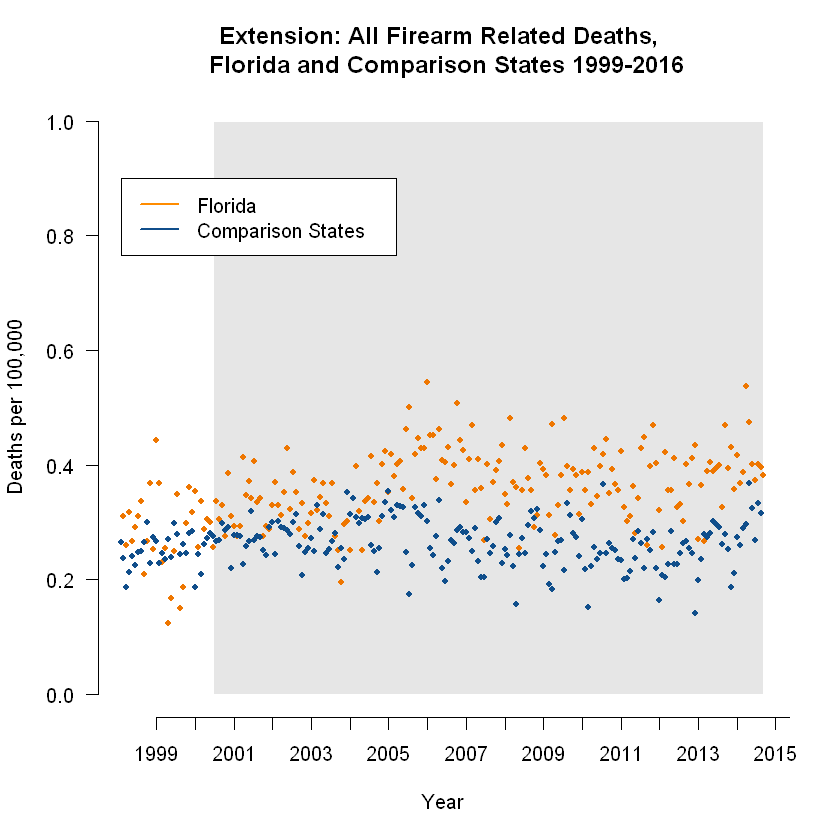

In [64]:
repcombo <- subset(alldata, Cause=="Combo")

# Setup variables
repcombo$Level <- c(rep(0,81),rep(1,135),rep(0,81),rep(1,135))
repcombo$TXtime <- repcombo$Treatment * repcombo$Time
repcombo$TXlevel <- repcombo$Treatment * repcombo$Level
repcombo$TXtrend <- repcombo$Treatment * repcombo$Trend

# Model
repcombo_linear <- glm(Deaths ~ offset(log(StdPop)) + Time + Treatment + Level + Trend + 
                         TXtime + TXlevel + TXtrend, 
                       family=quasipoisson, data=repcombo)
repcombo_harmonic <- glm(Deaths ~ offset(log(StdPop)) + Time + Treatment + Level + Trend + 
                           TXtime + TXlevel + TXtrend + harmonic(MonthNo,2,12), 
                         family=quasipoisson, data=repcombo) 

repcombo.mod <- with(repcombo, Deaths/StdPop)
repcombo.datanew <- data.frame(StdPop=repcombo$StdPop,Level=repcombo$Level, Times = repcombo$Time/10, MonthNo = repcombo$MonthNo/10)

repcombo.pred1 <- predict(repcombo_linear,type="response",repcombo)/repcombo$StdPop
repcombo.pred2 <- predict(repcombo_linear,type="response",transform(repcombo,MonthNo=4.8))/(repcombo$StdPop)
###Plot for combo extension 
plot(repcombo$Time[1:216],repcombo.mod[1:216],
     type="n",
     ylim=c(0,1),
     frame.plot=F,
     ylab="Deaths per 100,000",
     xlab="Year",
     xaxt="n",
     las=2)
axis(1,at=0:17*13+12,tick=T,labels=1999:2016) 
rect(31,0,216,1, col=grey(0.9),border=F)
points(repcombo$Time[1:216],repcombo.mod[1:216],
       col="darkorange2",
       pch=20)
points(repcombo$Time[217:432],repcombo.mod[217:432],
       col="dodgerblue4",
       pch=20)
lines(repcombo$Time[1:81], fitted(repcombo_linear)[1:81], col="darkorange",lty=5)
lines(repcombo$Time[1:81], fitted(repcombo_harmonic)[1:81], col="darkorange",lwd=2)
lines(repcombo$Time[82:216], fitted(repcombo_linear)[82:216], col="darkorange",lty=5)
lines(repcombo$Time[82:216], fitted(repcombo_harmonic)[82:216], col="darkorange",lwd=2)
lines(repcombo$Time[217:297], fitted(repcombo_linear)[217:297], col="dodgerblue4",lty=5)
lines(repcombo$Time[217:297], fitted(repcombo_harmonic)[217:297], col="dodgerblue4",lwd=2)
lines(repcombo$Time[298:432], fitted(repcombo_linear)[298:432], col="dodgerblue4",lty=5)
lines(repcombo$Time[298:432], fitted(repcombo_harmonic)[298:432], col="dodgerblue4",lwd=2)
legend(x=0, y=0.9, legend=c("Florida","Comparison States"), col=c("darkorange","dodgerblue4"),lwd = 2)
title(main="Extension: All Firearm Related Deaths, \n Florida and Comparison States 1999-2016")


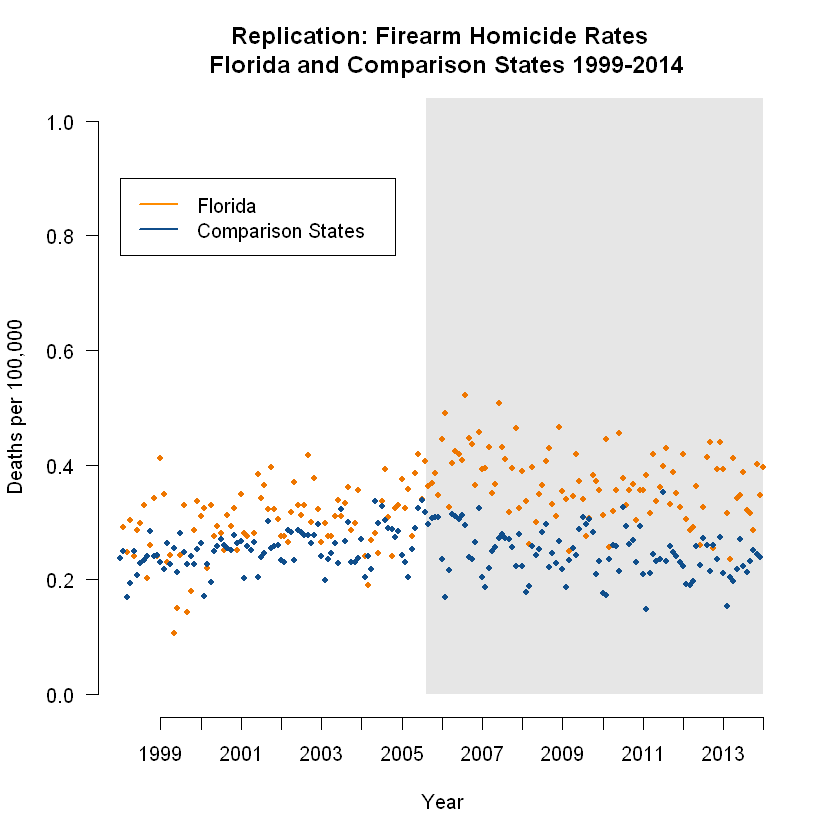

In [52]:
# Replication Plot for replication firearm homicide 
plot(repfirehom$Time[1:192],repfirehom.mod[1:192],
     type="n",
     ylim=c(0,1),
     frame.plot=F,
     ylab="Deaths per 100,000",
     xlab="Year",
     xaxt="n",
     las=2)
axis(1,at=0:15*12+12,tick=T,labels=1999:2014) 
rect(91,0,192,2, col=grey(0.9),border=F)
points(repfirehom$Time[1:192],repfirehom.mod[1:192],
       col="darkorange2",
       pch=20)
points(repfirehom$Time[193:384],repfirehom.mod[193:384],
       col="dodgerblue4",
       pch=20)

legend(x=0, y=0.9, legend=c("Florida","Comparison States"), col=c("darkorange","dodgerblue4"),lwd = 2)
title(main="Replication: Firearm Homicide Rates \n Florida and Comparison States 1999-2014")

In [53]:
# Homicide 

summary(hom.white$Deaths[repdata$After==0])
summary(hom.white$Deaths[repdata$After==1])

summary(hom.black$Deaths[repdata$After==0])
summary(hom.black$Deaths[repdata$After==1])

summary(hom.20_34$Deaths[repdata$After==0])
summary(hom.20_34$Deaths[repdata$After==1])

summary(hom.35over$Deaths[repdata$After==0])
summary(hom.35over$Deaths[repdata$After==1])

summary(hom.male$Deaths[repdata$After==0])
summary(hom.male$Deaths[repdata$After==1])

summary(hom.female$Deaths[repdata$After==0])
summary(hom.female$Deaths[repdata$After==1])

# Suicide

summary(suic.white$Deaths[repdata$After==0])
summary(suic.white$Deaths[repdata$After==1])

summary(suic.20_34$Deaths[repdata$After==0])
summary(suic.20_34$Deaths[repdata$After==1])

summary(suic.35over$Deaths[repdata$After==0])
summary(suic.35over$Deaths[repdata$After==1])

summary(suic.male$Deaths[repdata$After==0])
summary(suic.male$Deaths[repdata$After==1])

summary(suic.female$Deaths[repdata$After==0])
summary(suic.female$Deaths[repdata$After==1])


ERROR: Error in summary(hom.white$Deaths[repdata$After == 0]): object 'hom.white' not found
